# Travaux pratiques : Séance 3
## Première partie : les bases

Importation des librairies et des modules nécessaires

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Importation du dataset et sauvegarde de la partie data/target

In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2] # sélection des deux premières features (longueur et largeur des sépales)
y = iris.target

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### English / francais

sepal = sépale

petal = pétale

<b>Affichons les dix premières lignes de les features

In [5]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

<b>Affichons les dix premières lignes du target

In [6]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<b>Visualisons la longueur de l'ensemble de données

In [7]:
len (iris.data)

150

<b> Il y a trois classes:

            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
print(y) # /!\ l'ordre des données nous oblige à faire la séparation en ensemble d'entrainement/test "au hasard"
         # --> on doit utiliser la fonction train_test_split

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<b>Fonction permettant d'afficher les données

In [10]:
def plot_dataset(dataset,index_feature1,index_feature2):
    colors = ['red','blue','green']
    for i in range(len(dataset.target_names)):
        plt.scatter(dataset.data[dataset.target==i,index_feature1], dataset.data[dataset.target==i,index_feature2], c=colors[i], label= dataset.target_names[i])
    plt.xlabel(dataset.feature_names[index_feature1])
    plt.ylabel(dataset.feature_names[index_feature2])
    plt.legend()
    plt.show()

<b> Comment fonctionne la fonction qui permet de visualiser le graphique ?

On utilise une boucle qui va de 0 à 2. Tout d’abord, toutes les données appartenant à la classe 0 sont affichées en rouge ; puis en bleu ceux de classe 1 ; enfin ceux de la classe 2 sont en vert

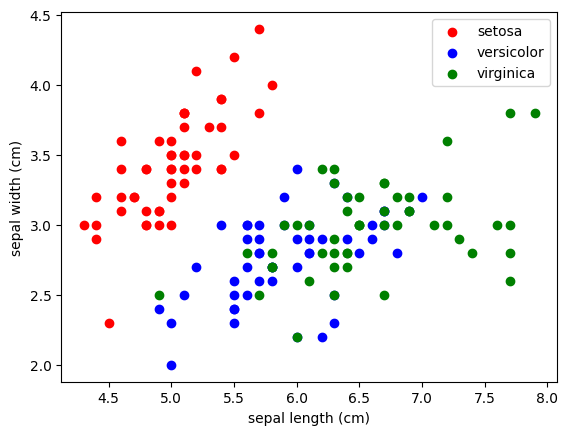

In [11]:
plot_dataset(iris,0,1)

Division des données en un ensemble d'entrainement et de test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.33,random_state=42) 

Génération d'un modèle K-nn, entrainement sur l'ensemble d'entrainement et affichage des accuracy pour l'ensemble d'entrainement et l'ensemble de test

In [13]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
print("Accuracy de l'ensemble de test : ", accuracy_test)

y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
print("Accuracy de l'ensemble d'entrainement : ", accuracy_train)

Accuracy de l'ensemble de test :  0.8
Accuracy de l'ensemble d'entrainement :  0.84


<b>Affichage des frontières de décision

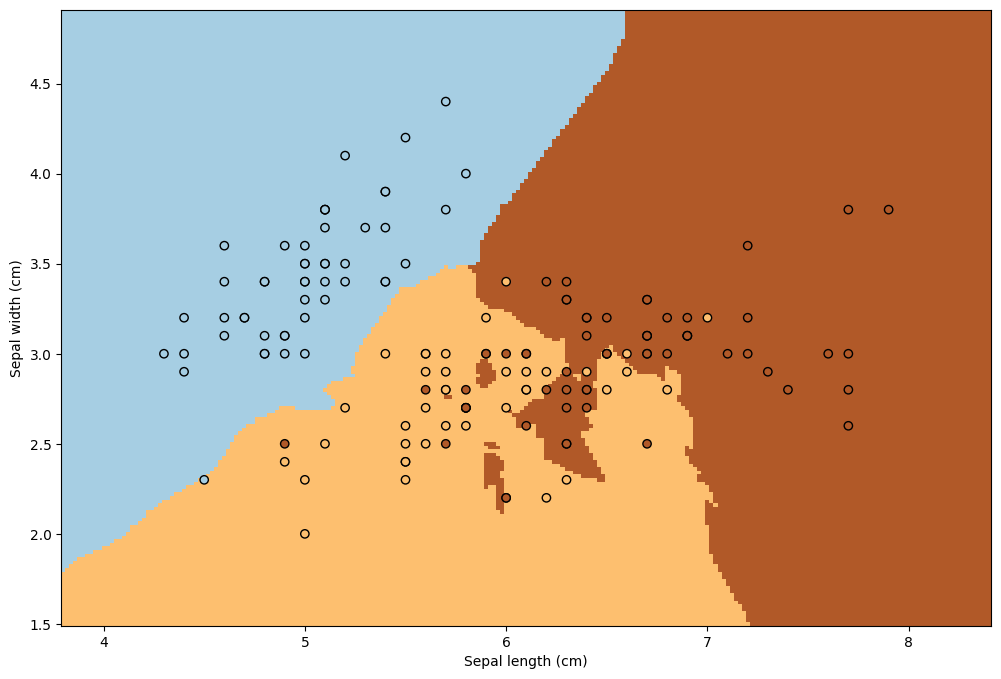

In [14]:
h = .02 # le pas de la plage entre les valeurs minimales et maximales

x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 8))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:,0], X[:,1],c=y, edgecolors='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

plt.show()

<b> Comment fonctionne la fonction qui permet de visualiser les frontières de decision ?

Une grille rectangulaire est construite : les x vont de la valeur minimale à la valeur maximale du trait 0 (longueur des sépales), les y vont de la valeur minimale à la valeur maximale du trait 1 (largeur des sépales).

Nous interrogeons ensuite le modèle pour chacun des points de la grille. Chaque point est ainsi classé et coloré. Le résultat est une zone colorée avec les couleurs des trois classes.

<b>Cela construit la grille:

In [15]:
h = .02 # le pas de la plage entre les valeurs minimales et maximales

x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


<b> Cela le colore: 

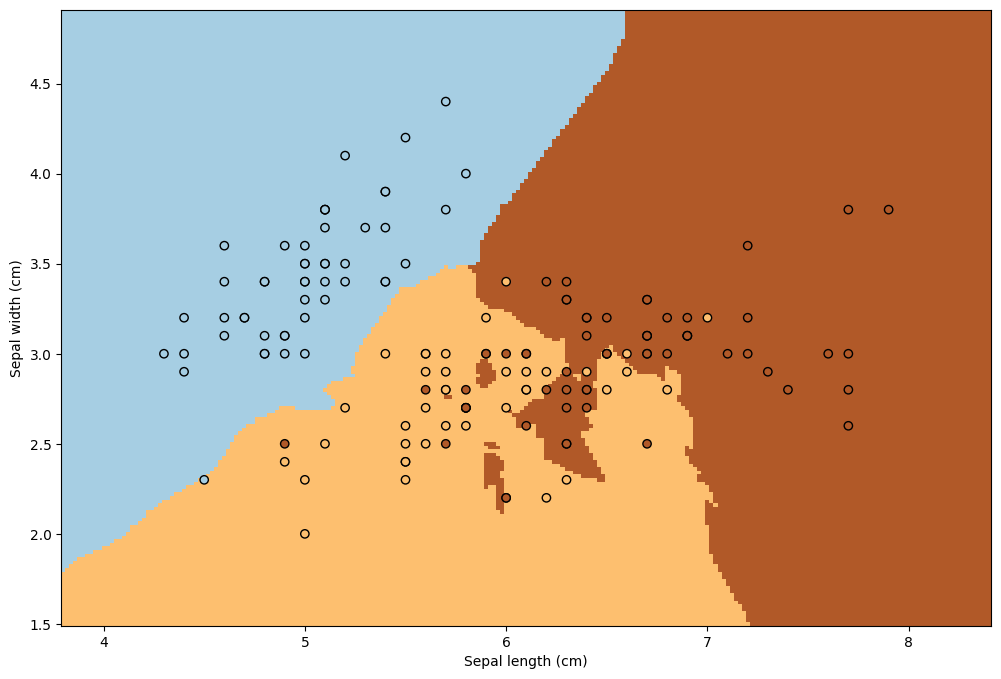

In [16]:
# interrogeons le modèle pour chacun des points de la grille
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# visualisons le résultat
plt.figure(1, figsize=(12, 8))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)
plt.scatter(X[:,0], X[:,1],c=y, edgecolors='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

plt.show()